In [60]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #decompose data

from statsmodels.tsa.stattools import adfuller # For DF test
from statsmodels.tsa.stattools import grangercausalitytests #Fo Granger Casualilty test
from scipy import signal  #for deterending
from pandas.plotting import autocorrelation_plot # For checking the seasonality by auto correlation function

from statsmodels.tsa.arima.model import ARIMA # for forecasting by ARIMA model

In [ ]:
'''The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate.
This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure.

1. First step contains data exploration finding the number of train and test sets, finding the missed values, mean, std and...
2. Decompose data: By looking at the graph of score data above, we can see a general increasing trend with no clear pattern of
   seasonal or cyclical changes. A useful Python function called seasonal_decompose within the 'statsmodels' package can help us 
   to decompose the data into four different components: Observed, Trended, Seasonal, Residual.
   
3. Checking stationay: To check the stationary we can apply two different methods:
   - visualization method:
   - DF test: 
   
   
4. Detrending: We should find the existance of trends in time series and remove them from dataset. Trends make non-stationary dataset
   It means that identifying time series and removing them is important. In Decompose step we can find the existance of trends. In this
   step we would like to remove trends by signal method in scipy library.

5. Identifying seasonality: The quickest way to get an idea of whether or not your data has a seasonal trend is by plotting it
   and then check the repeat behaviour for different periof of time such az week, month, year,....
   
   Another way to check seasonality is auto correlation function. By plotting auto correlation function we can find the seasonality 
   in data set such that if a dataset has seasonality then its auto correlation function shows definitive repeated spikes at the
   multiples of the seasonal window.
   
   Autocorrelation is simply the correlation of a series with its own lags.
   
   
   There are two types of seasonality: additive and multiplication. A simple way to correct for a seasonal component is to use differencing.
   To check the seasonality in dataset we can use the seasonal_decompose method in statsmodels library that can show the trend,
   seasonal and noise in dataset.
   There are multiple approached to remove seasonality.
   - Using moving avarage with length as the seasonal window.
   - Using seasonal difference(subtract the value of previous season from the current value)
   
   
6. Also, we can use Granger casuality test for finding wheather a time series data is useful to predict another time series.
   Granger casuality test just tell us about forecasting ability not the relationship between time series data.
   
   
7. Forecasting model by ARIMA(auto regression integrated moving avarage):    
   '''

In [34]:
train_df=pd.read_csv('DailyDelhiClimateTrain.csv')

In [35]:
train_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [36]:
train_df.info()

'''There are no missing values in train set'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


'There are no missing values in train set'

In [37]:
train_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [38]:
test_df=pd.read_csv('DailyDelhiClimateTest.csv')

In [39]:
test_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [40]:
test_df.info()
'''There are no missing values in test set.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


'There are no missing values in test set.'

In [41]:
test_df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


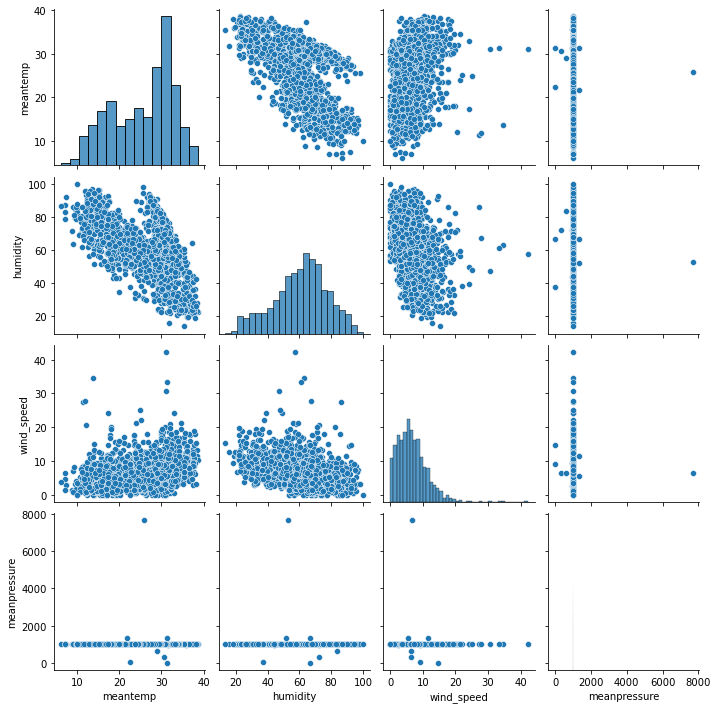

In [42]:
sns.pairplot(train_df)

In [43]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d')

In [44]:
#multiplicative decomposition

def seasonal_function(t):
    decomposition=sm.tsa.seasonal_decompose(t, model='multiplicative', extrapolate_trend='freq', period=365)
    fig = decomposition.plot()
    #fig.set_size_inches(14,7)
    plt.show()

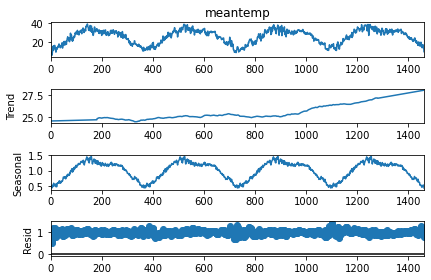

In [45]:
seasonal_function(train_df['meantemp'])

In [46]:
#Additive decomposition

def seasonal_function(t):
    decomposition=sm.tsa.seasonal_decompose(t, model='additive', extrapolate_trend='freq', period=365)
    fig = decomposition.plot()
    #fig.set_size_inches(14,7)
    plt.show()

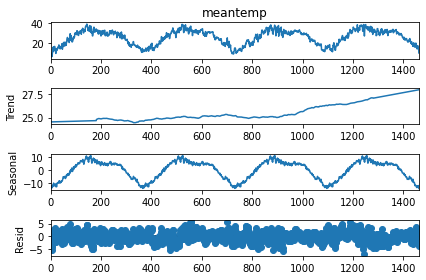

In [47]:
seasonal_function(train_df['meantemp'])

In [48]:
# stationarity:

'''Here we can check stationarity by visualization and plot the dataset, mean and std.'''

def stationary(df):
    mean_df=pd.Series(df).rolling(window=12).mean()
    std_df=pd.Series(df).rolling(window=12).std()
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(df)
    ax.plot(mean_df,label='mean');
    ax.plot(std_df,label='std');
    ax.legend()

'In this plot we can see that std is a constant value while the mean is not constant. It means that dataset is not a \nstationary data.'

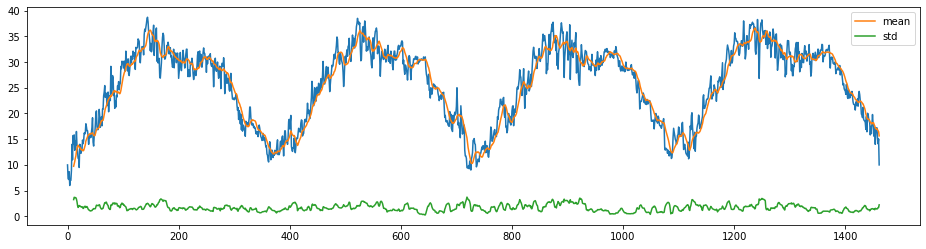

In [49]:
stationary(train_df['meantemp'])

'''In this plot we can see that std is a constant value while the mean is not constant. It means that dataset is not a 
stationary data.'''

In [50]:
'''Now we can check by DF method. If the value of p-value is less than 0.05 then dataset is stationary and otherwise dataset
is not stationary'''


def df_test(time_series):
    
    print('Results of DF Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print (dfoutput)

In [51]:
df_test(train_df['meantemp'])

'''As we have seen in visualization dataset is not stationary. The amount of p-value is higher than 0.05, it shows that dataset
is not a stationary dataset.'''

Results of DF Test:
Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


'As we have seen in visualization dataset is not stationary. The amount of p-value is higher than 0.05, it shows that dataset\nis not a stationary dataset.'

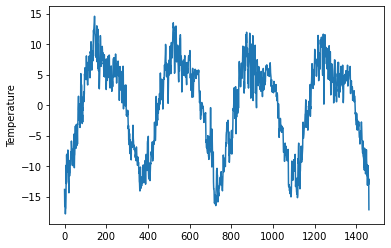

In [52]:
## Deterending

detrended = signal.detrend(train_df['meantemp'].values)
plt.ylabel("Temperature")
plt.plot(detrended)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

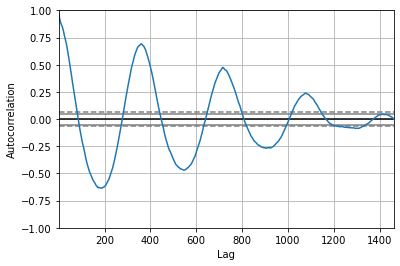

In [54]:
#checking the seasonality by auto correlation function

autocorrelation_plot(train_df['meantemp'].tolist())

[]

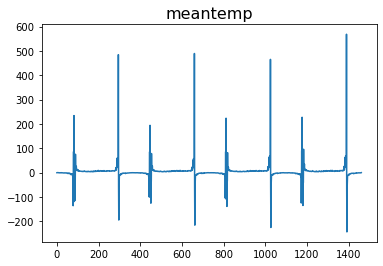

In [55]:
#Deseasonalize

# Time Series Decomposition
result_mul = sm.tsa.seasonal_decompose(train_df['meantemp'], model='additive', extrapolate_trend='freq', period=365)

# Deseasonalize
deseasonalized = train_df['meantemp'].values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('meantemp', fontsize=16)
plt.plot()

In [59]:
#Granger casuality test

grangercausalitytests(train_df[['meantemp', 'humidity']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1
ssr based chi2 test:   chi2=8.3655  , p=0.0038  , df=1
likelihood ratio test: chi2=8.3416  , p=0.0039  , df=1
parameter F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2
ssr based chi2 test:   chi2=5.5360  , p=0.0628  , df=2
likelihood ratio test: chi2=5.5255  , p=0.0631  , df=2
parameter F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2


{1: ({'ssr_ftest': (8.348287242759001, 0.00391758651054697, 1458.0, 1),
   'ssr_chi2test': (8.365464788525996, 0.003824187986771466, 1),
   'lrtest': (8.341606126880833, 0.003874732859744176, 1),
   'params_ftest': (8.348287242759003, 0.00391758651054697, 1458.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7585146949627375, 0.06371737139413886, 1455.0, 2),
   'ssr_chi2test': (5.535988253808381, 0.06278782291705486, 2),
   'lrtest': (5.5255191051082875, 0.06311735216461932, 2),
   'params_ftest': (2.758514694962817, 0.06371737139413877, 1455.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [70]:
#Spliting data into two set train set and validation set

train_set = train_df['meantemp'][:int(np.floor((len(train_df)/100)*70))]
test_set = train_df['meantemp'][int(np.floor((len(train_df)/100)*70)):]

In [71]:
# Forecasting by Autoregressive Integrated Moving Avarage(ARIMA) model.

'''This method will basically join the previous two AR and MA. Model parameters will be the sum of the two.'''

model_arima=ARIMA(train_set, order=(1,1,1)).fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1023
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1956.003
Date:                Thu, 09 Dec 2021   AIC                           3918.006
Time:                        17:32:12   BIC                           3932.795
Sample:                             0   HQIC                          3923.621
                               - 1023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5606      0.053     10.498      0.000       0.456       0.665
ma.L1         -0.7997      0.042    -19.117      0.000      -0.882      -0.718
sigma2         2.6905      0.088     30.510      0.0

In [72]:
fc = model_arima.get_forecast(len(train_df['meantemp'][int(np.floor((len(train_df)/100)*70)):]))
fc_series = pd.Series(fc.predicted_mean, index=test_set.index)

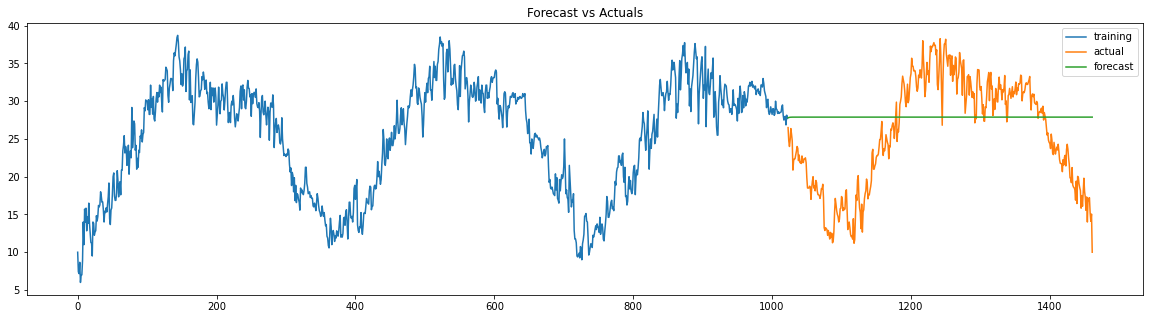

In [76]:
# Plot the forecasted values

plt.figure(figsize=(20,5))
plt.plot(train_set, label='training')
plt.plot(test_set, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend()
plt.show()